In [1]:
import SQcircuit_extensions as sq_ext
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import qutip as qt
from matplotlib.gridspec import GridSpec


# %matplotlib ipympl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
importlib.reload(sq_ext)
importlib.reload(sq)
# np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})

<module 'SQcircuit' from 'C:\\Users\\Simon\\miniconda3\\envs\\tunable-cc\\lib\\site-packages\\SQcircuit\\__init__.py'>

In [2]:
importlib.reload(sq_ext)

<module 'SQcircuit_extensions' from 'C:\\Users\\Simon\\bwSyncShare\\ANALYSIS\\GFQ_Coupler\\CSIC_KIT\\Self contained siumulation for experimentalists\\Self contained for experimentalists\\SQcircuit_extensions.py'>

In [3]:
fF  = 1e-15
nH  = 1e-9
GHz = 1e9
h   = 6.626e-34
e0  = 1.602e-19
Φ_0 = h / (2 * e0)

In [4]:
opt_dir = 'opt_results'
cmap = mpl.colormaps['viridis']

In [5]:
fq2_set_vec = np.array([3.62  , 3.6245, 3.629 , 3.6335, 3.638 , 3.6425, 3.647 , 3.6515,
       3.656 , 3.6605, 3.665 , 3.6695, 3.674 , 3.6785, 3.683 , 3.6875,
       3.692 , 3.6965, 3.701 , 3.7055, 3.71  ])
f2_of_max_g = 3.6587
x0_array_opt = np.array([0.00026772, 0.00030737, 0.00034445, 0.00042214, 0.00055151,
       0.00069153, 0.00096878, 0.        , 0.        , 0.        ,
       0.0014975 , 0.0010779 , 0.00085284, 0.00067319, 0.00059366,
       0.00048784, 0.00044596, 0.00041887, 0.00035964, 0.00038036,
       0.00031654])

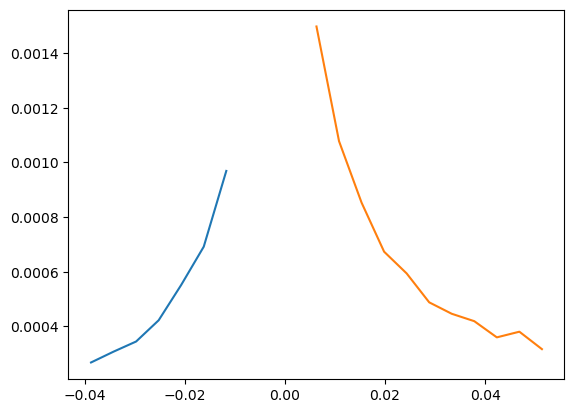

In [6]:
%matplotlib inline

plt.plot(fq2_set_vec[:7] - f2_of_max_g, x0_array_opt[:7])
plt.plot(fq2_set_vec[10:] - f2_of_max_g, x0_array_opt[10:])
plt.show()

# Qubit 1 - Qubit 3, no resonator, vs phi_ext_2

In [7]:
CF_1, LF_1, EJ_1, _, _      = np.load(opt_dir +  '/qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, LR_1, _, _  = np.load(opt_dir +  '/resonator_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _      = np.load(opt_dir +  '/qubit_2' + '.npz')['parameters_opt']
CR_2, LR_2, Δ_2, _, _       = np.load(opt_dir +  '/resonator_2' + '.npz')['parameters_opt']
CF_3, LF_3, EJ_3, _, _      = np.load(opt_dir +  '/qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, LR_3, _, _  = np.load(opt_dir +  '/resonator_3' + '.npz')['parameters_opt']
C_int_12, _, _, _           = np.load(opt_dir +  '/qubit_1_qubit_2' + '.npz')['parameters_opt']
C_int_12, C_int_23, C_int_13, _, _, _, _, _, _, _, _, _= np.load(opt_dir +  '/qubit_1_qubit_2_qubit_3' + '.npz')['parameters_opt'] 
# C_int_13 = 1e10

In [8]:
C11 = CF_1
C22 = CF_2
C33 = CF_3

C12 = 0.05
C21 = 0.05
C23 = 0.05
C32 = 0.05

C13 = 0.0016
C31 = C13

C = np.array([ [C11, C12, C13], [C21, C22, C23], [C31, C32, C33] ])
C_inv = np.linalg.inv(C)
C_mat = C_inv

In [9]:
C_inv

array([[ 3.16591034e-02, -7.13106570e-05, -1.80522360e-06],
       [-7.13106570e-05,  4.50519932e-02, -8.63521688e-05],
       [-1.80522360e-06, -8.63521688e-05,  3.83365573e-02]])

In [10]:
nmax_f = 10
nmax_r =5
# φ_ext_2_values = np.linspace(0.5165,0.519,100)
n_eig_circuits=3
n_eig_qubit=4
extra_eigs = 10

In [11]:
phi_resonance

NameError: name 'phi_resonance' is not defined

In [ ]:
φ_ext_2_values = np.concatenate((np.linspace(0.5, 0.516,51), np.linspace(0.516, 0.52,51), np.linspace(0.52, 0.54,51)))

In [ ]:
SWT             = np.zeros([len(φ_ext_2_values), 4, 4])
Qs              = np.zeros([len(φ_ext_2_values), 4, 4], dtype='complex')
g_13_analytic   = np.zeros([len(φ_ext_2_values)])
Δfq2            = np.zeros([len(φ_ext_2_values)])

fluxonium_1 = sq_ext.sq_fluxonium(C_F_eff=C_inv[0, 0] ** -1, L_F_eff = LF_1, EJ=EJ_1, nmax_f=nmax_f)
fluxonium_3 = sq_ext.sq_fluxonium(C_F_eff=C_inv[2, 2] ** -1, L_F_eff = LF_3, EJ=EJ_3, nmax_f=nmax_f)

φ_ext_3_resonance = sq_ext.find_resonance(fluxonium_1.hamiltonian(), fluxonium_3)
loop_3 = fluxonium_3.loops[0]
loop_3.set_flux(φ_ext_3_resonance)

ω_1 = sq_ext.diag(fluxonium_1.hamiltonian(),2,remove_ground=True)[0][1]
ω_3 = sq_ext.diag(fluxonium_3.hamiltonian(),2,remove_ground=True)[0][1]

In [ ]:
def calc_effective_qq_coupling(φ_ext_2, C_inv):
    
    
    ω_1 = sq_ext.diag(fluxonium_1.hamiltonian(),2,remove_ground=True)[0][1]
    ω_3 = sq_ext.diag(fluxonium_3.hamiltonian(),2,remove_ground=True)[0][1]
    
    fluxonium_2 = sq_ext.sq_fluxonium(C_F_eff=C_inv[1, 1] ** -1, L_F_eff = LF_2, EJ=EJ_2, nmax_f=nmax_f, φ_ext=φ_ext_2)
    ω_2 = sq_ext.diag(fluxonium_2.hamiltonian(),2,remove_ground=True)[0][1]
    Δfq2 = (ω_2 - ω_1)*1e3
    
    circuits = [fluxonium_1, fluxonium_2, fluxonium_3]
    H_circuits = [circuit.hamiltonian() for circuit in circuits]
    E_circuits = [sq_ext.diag(H, n_eig_circuits, solver='numpy')[0] for H in H_circuits]
    ψ_circuits = [sq_ext.diag(H, n_eig_circuits, solver='numpy')[1] for H in H_circuits]
    
    H_0, H   = sq_ext.hamiltonian_fluxonium_C_fluxonium_C_fluxonium(C_inv, circuits, nmax_f=nmax_f, return_H_0=True)
    V = H-H_0

    ψ_00 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,0])])
    ψ_10 = qt.tensor([qt.Qobj(ψ_circuits[0][:,1]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,0])])
    ψ_01 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,1])])
    ψ_11 = qt.tensor([qt.Qobj(ψ_circuits[0][:,1]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,1])])

    ψ_0 = [ψ_00,ψ_01,ψ_10,ψ_11]
    
    ψ_010 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,1]), qt.Qobj(ψ_circuits[2][:,0])])
    
    ψ_110 = qt.tensor([qt.Qobj(ψ_circuits[0][:,1]), qt.Qobj(ψ_circuits[1][:,1]), qt.Qobj(ψ_circuits[2][:,0])])
    ψ_011 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,1]), qt.Qobj(ψ_circuits[2][:,1])])
    ψ_111 = qt.tensor([qt.Qobj(ψ_circuits[0][:,1]), qt.Qobj(ψ_circuits[1][:,1]), qt.Qobj(ψ_circuits[2][:,1])])
    
    ψ_200 = qt.tensor([qt.Qobj(ψ_circuits[0][:,2]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,0])])
    ψ_020 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,2]), qt.Qobj(ψ_circuits[2][:,0])])
    ψ_002 = qt.tensor([qt.Qobj(ψ_circuits[0][:,0]), qt.Qobj(ψ_circuits[1][:,0]), qt.Qobj(ψ_circuits[2][:,2])])
    
    ψ_0_high = [ψ_010, ψ_110, ψ_011, ψ_111, ψ_200, ψ_020, ψ_002]

    E_0_ψ_0  = [ np.real((ψ_0_i.dag() * H_0 * ψ_0_i).data[0,0])/2/np.pi/GHz for ψ_0_i in ψ_0]
    E_0_ψ_0_high  = [ np.real((ψ_0_i.dag() * H_0 * ψ_0_i).data[0,0])/2/np.pi/GHz for ψ_0_i in ψ_0_high]
    E_0  = sq_ext.diag(H_0 , n_eig=len(ψ_0)+extra_eigs, out='GHz', solver='scipy')[0]
    
    E_000 = E_0_ψ_0[0]
    
    E_0_ψ_0         -= E_000
    E_0_ψ_0_high    -= E_000
    E_0             -= E_000
    subspace_indices = sq_ext.find_close_indices(E_0_ψ_0, E_0)


    high_subspace_indices = sq_ext.find_close_indices(E_0_ψ_0_high, E_0)
    valid_high_indices = np.where(np.array(high_subspace_indices) > max(subspace_indices))[0]
    high_subspace_indices = [high_subspace_indices[valid_high_index] for valid_high_index in valid_high_indices]
        
    # ψ_0_high        = [ψ_0_high[index]      for index in valid_high_indices]
    # E_0_ψ_0_high    = [E_0_ψ_0_high[index]  for index in valid_high_indices]

    E, ψ = sq_ext.diag(H  , n_eig=len(ψ_0)+extra_eigs, out='GHz', solver='Qutip', qObj=True)
    ψ = ψ[subspace_indices]
    E = E[subspace_indices]
    
    # print('Punto de control 1')
    H_eff_p1  = sq_ext.H_eff_p1_large (ψ_0, H, real=True, remove_ground=True)
    H_eff_p2  = H_eff_p1 + sq_ext.H_eff_p2_large(ψ_0, ψ_0_high, E_0_ψ_0, E_0_ψ_0_high, V, remove_ground=True)
    H_eff_SWT, Qs = sq_ext.H_eff_SWT_large(ψ_0, ψ, E, remove_ground=True,return_Q=True)
    
    SWT = sq_ext.decomposition_in_pauli_4x4(H_eff_SWT , print_pretty=False)
    
    #Analytics:
    fluxonium_1.diag(2)
    fluxonium_2.diag(2)
    fluxonium_3.diag(2)
    
    Q_1 = np.abs(fluxonium_1.charge_op(0, basis='eig')[0,1])
    Q_2 = np.abs(fluxonium_2.charge_op(0, basis='eig')[0,1])
    Q_3 = np.abs(fluxonium_3.charge_op(0, basis='eig')[0,1])
    
    ω_1 = sq_ext.diag(fluxonium_1.hamiltonian(),2, remove_ground=True)[0][1]
    ω_2 = sq_ext.diag(fluxonium_2.hamiltonian(),2, remove_ground=True)[0][1]
    ω_3 = sq_ext.diag(fluxonium_3.hamiltonian(),2, remove_ground=True)[0][1]
    
    Δ_12 = (ω_1 - ω_2) # maybe change sign
    Δ_23 = (ω_3 - ω_2) 
    Σ_12 = ω_1 + ω_2
    Σ_23 = ω_3 + ω_2

    g_12 = C_inv[0, 1] * fF**-1 * Q_1 * Q_2 /2/np.pi/GHz
    g_23 = C_inv[1, 2] * fF**-1 * Q_2 * Q_3 /2/np.pi/GHz
    g_13 = C_inv[0, 2] * fF**-1 * Q_1 * Q_3 /2/np.pi/GHz

    g_eff = g_12*g_23*(1/Δ_12 + 1/Δ_23 - 1/Σ_12 - 1/Σ_23)/2 + g_13

    g_13_analytic = g_eff
    
    return Δfq2, SWT, g_13_analytic

In [355]:
for i, φ_ext_2 in enumerate(φ_ext_2_values):
    
    Δfq2[i], SWT[i,:], g_13_analytic[i] = calc_effective_qq_coupling(φ_ext_2, C_inv)

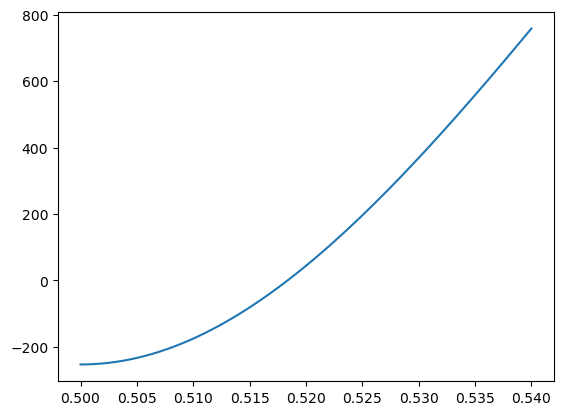

In [482]:
plt.plot(φ_ext_2_values, Δfq2, '-')

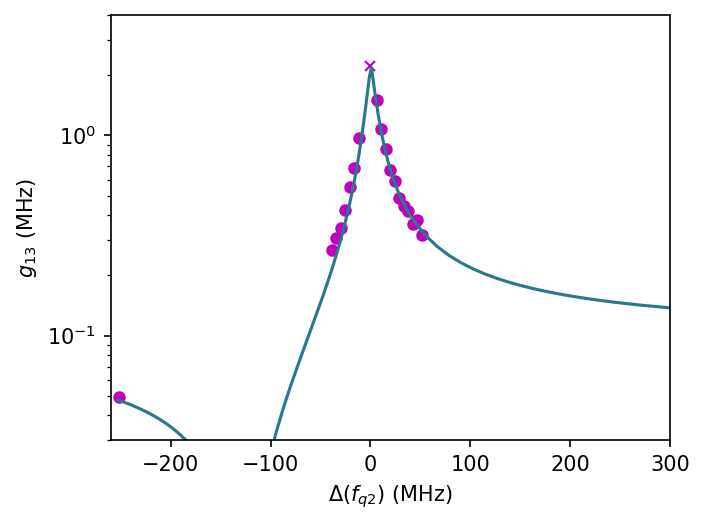

In [358]:
fig, ax = plt.subplots(1, 1 ,dpi=150, figsize=np.array([8, 6])*0.6)


colors = [cmap(0.0), cmap(0.4), cmap(0.8)]

detuned_Δfq2 = -252
detuned_g13 = 0.04917


ax.plot(detuned_Δfq2, detuned_g13, marker='o', ls='', color='m', ms=5, label='pt used for exp fit, extract with spectros.')


ax.set_xlim(-260, 300)
#ax.yaxis.tick_right()


ax.plot((fq2_set_vec[:7]-f2_of_max_g)*1e3, x0_array_opt[:7]*1e3, color='m', marker='o', ls='', ms=5,label='spectrum')
ax.plot((fq2_set_vec[10:]-f2_of_max_g)*1e3, x0_array_opt[10:]*1e3, color='m', marker='o', ls='', ms=5)
ax.plot(0,3.16/np.sqrt(2), color='m', marker='x', ls='', ms=5, label='Ramsey')


σxσx = np.abs(SWT[:, 1, 1])
σyσy = np.abs(SWT[:, 2, 2])
σzσz = np.abs(SWT[:, 3, 3])

ax.plot(Δfq2 , np.sqrt(σyσy**2 + σxσx**2)  * 1e3, '-', color=colors[1])
#ax.plot(Δfq2 , σzσz  * 1e3, color=colors[2], linestyle=':')


        
ax.set_yscale('log')
#ax.set_xscale('symlog', linthresh = 100)


ax.set_xlabel(r'$\Delta(f_{q2})$ (MHz)')
ax.set_ylabel(r'$g_{13}$ (MHz)')

ax.set_ylim([3e-2, 4])
#ax.set_xlim([-700, 700])


# # inset Axes....
# x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
# axins = ax.inset_axes(
#     [0.5, 0.5, 0.47, 0.47],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# axins.plot(Z2)

# ax.indicate_inset_zoom(axins, edgecolor="black")

fig.tight_layout()

# Export or show the figure
# fig.show()


In [386]:
(fq2_set_vec[0] - f2_of_max_g)*1e3

-38.69999999999996

In [377]:
x0_array_opt[:7]*1e3

array([0.26772, 0.30737, 0.34445, 0.42214, 0.55151, 0.69153, 0.96878])

In [389]:
phi_resonance = φ_ext_2_values[np.argmin(np.abs(Δfq2))]
phi_1 = φ_ext_2_values[np.argmin(np.abs(Δfq2 - (fq2_set_vec[0] -f2_of_max_g)*1e3))]
phi_2 = φ_ext_2_values[np.argmin(np.abs(Δfq2 - (fq2_set_vec[-1] -f2_of_max_g)*1e3))]

In [391]:
0.5, phi_1, phi_resonance, phi_2

(0.5, 0.5168, 0.5184, 0.5204)

In [392]:
0.04917, x0_array_opt[0]*1e3, 3.16, x0_array_opt[-1]*1e3

(0.04917, 0.26772, 3.16, 0.31654)

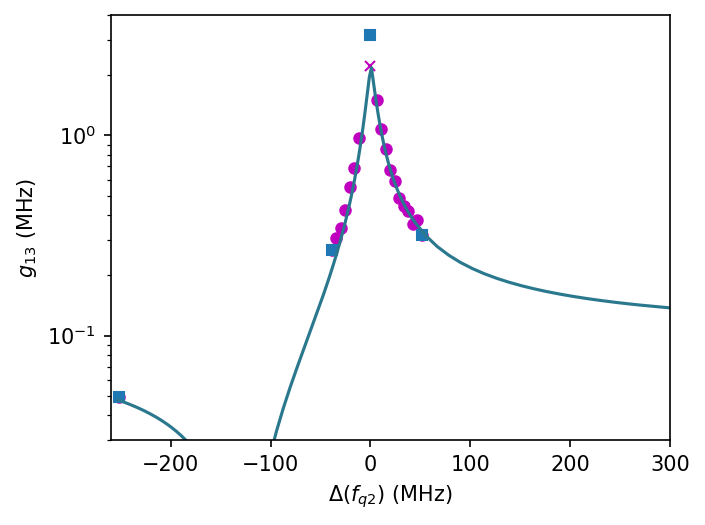

In [397]:
fig, ax = plt.subplots(1, 1 ,dpi=150, figsize=np.array([8, 6])*0.6)


colors = [cmap(0.0), cmap(0.4), cmap(0.8)]

detuned_Δfq2 = -252
detuned_g13 = 0.04917


ax.plot(detuned_Δfq2, detuned_g13, marker='o', ls='', color='m', ms=5, label='pt used for exp fit, extract with spectros.')


ax.set_xlim(-260, 300)
#ax.yaxis.tick_right()


ax.plot((fq2_set_vec[:7]-f2_of_max_g)*1e3, x0_array_opt[:7]*1e3, color='m', marker='o', ls='', ms=5,label='spectrum')
ax.plot((fq2_set_vec[10:]-f2_of_max_g)*1e3, x0_array_opt[10:]*1e3, color='m', marker='o', ls='', ms=5)
ax.plot(0,3.16/np.sqrt(2), color='m', marker='x', ls='', ms=5, label='Ramsey')

ax.plot(np.array([-252, (fq2_set_vec[0] - f2_of_max_g)*1e3, 0, (fq2_set_vec[-1] - f2_of_max_g)*1e3]), np.array([0.04917, x0_array_opt[0]*1e3, 3.16, x0_array_opt[-1]*1e3]), 's', ms = 5)


σxσx = np.abs(SWT[:, 1, 1])
σyσy = np.abs(SWT[:, 2, 2])
σzσz = np.abs(SWT[:, 3, 3])

ax.plot(Δfq2 , np.sqrt(σyσy**2 + σxσx**2)  * 1e3, '-', color=colors[1])
#ax.plot(Δfq2 , σzσz  * 1e3, color=colors[2], linestyle=':')


        
ax.set_yscale('log')
#ax.set_xscale('symlog', linthresh = 100)


ax.set_xlabel(r'$\Delta(f_{q2})$ (MHz)')
ax.set_ylabel(r'$g_{13}$ (MHz)')

ax.set_ylim([3e-2, 4])
#ax.set_xlim([-700, 700])


# # inset Axes....
# x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
# axins = ax.inset_axes(
#     [0.5, 0.5, 0.47, 0.47],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# axins.plot(Z2)

# ax.indicate_inset_zoom(axins, edgecolor="black")

fig.tight_layout()

# Export or show the figure
# fig.show()


In [ ]:
plt.plot()

# Fit curve to offres and onres point

In [496]:
def calc_residuals(C12, C13):
    C11 = CF_1
    C22 = CF_2
    C33 = CF_3

    C21 = C12
    C23 = C12
    C32 = C12
    
    C31 = C13

    C = np.array([ [C11, C12, C13], [C21, C22, C23], [C31, C32, C33] ])
    C_inv = np.linalg.inv(C)
    C_mat = C_inv

    phi_offres = 0.5
    phi_1 = 0.5168
    phi_resonance = 0.5184
    phi_2 = 0.5204
    
    g_offres_meas = 0.04917/np.sqrt(2)
    g_1_meas = x0_array_opt[0]*1e3
    g_onres_meas = 3.16/np.sqrt(2)
    g_2_meas = x0_array_opt[-1]*1e3
    
    Δfq2, SWT, g_13_analytic = calc_effective_qq_coupling(phi_offres, C_inv)
    g_offres = (np.abs(SWT[1,1]) + np.abs(SWT[2,2])) * 1e3
    Δfq2, SWT, g_13_analytic = calc_effective_qq_coupling(phi_1, C_inv)
    g_1 = (np.abs(SWT[1,1]) + np.abs(SWT[2,2])) * 1e3
    Δfq2, SWT, g_13_analytic = calc_effective_qq_coupling(phi_resonance, C_inv)
    g_onres = (np.abs(SWT[1,1]) + np.abs(SWT[2,2])) * 1e3
    Δfq2, SWT, g_13_analytic = calc_effective_qq_coupling(phi_2, C_inv)
    g_2 = (np.abs(SWT[1,1]) + np.abs(SWT[2,2])) * 1e3

    return np.abs(g_offres_meas - g_offres)/g_offres_meas +  np.abs(g_1_meas - g_1)/g_1_meas + np.abs(g_onres_meas - g_onres)/g_onres_meas + np.abs(g_2_meas - g_2)/g_2_meas

In [499]:
C12_vec = np.linspace(0.00, 0.1, 30)
C13_vec = np.linspace(0.000, 0.0025, 29)

residuals_mat = np.zeros((C12_vec.size, C13_vec.size))

for i, c12 in enumerate(C12_vec):
    for j, c13 in enumerate(C13_vec):
        residuals_mat[i,j] = calc_residuals(c12, c13)

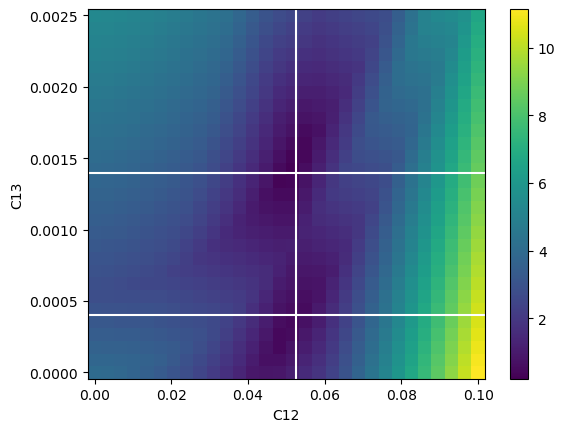

In [503]:
plt.pcolor(C12_vec, C13_vec, residuals_mat.T)
plt.xlabel('C12')
plt.ylabel('C13')

plt.axvline(0.0525, color = 'white')
plt.axhline(0.0004, color = 'white')
plt.axhline(0.0014, color = 'white')

plt.colorbar()

In [12]:
C11 = CF_1
C22 = CF_2
C33 = CF_3

C12 = 0.0525
C21 = 0.0525
C23 = 0.0525
C32 = 0.0525

C13 = 0.0015
C31 = C13

C = np.array([ [C11, C12, C13], [C21, C22, C23], [C31, C32, C33] ])
C_inv = np.linalg.inv(C)
C_mat = C_inv

### C12 = 0.0525, C13 = 0015

In [13]:
φ_ext_2_values = np.concatenate((np.linspace(0.5, 0.517,201), np.linspace(0.517, 0.519,201), np.linspace(0.519, 0.54,201)))

In [14]:
SWT             = np.zeros([len(φ_ext_2_values), 4, 4])
Qs              = np.zeros([len(φ_ext_2_values), 4, 4], dtype='complex')
g_13_analytic   = np.zeros([len(φ_ext_2_values)])
Δfq2            = np.zeros([len(φ_ext_2_values)])

fluxonium_1 = sq_ext.sq_fluxonium(C_F_eff=C_inv[0, 0] ** -1, L_F_eff = LF_1, EJ=EJ_1, nmax_f=nmax_f)
fluxonium_3 = sq_ext.sq_fluxonium(C_F_eff=C_inv[2, 2] ** -1, L_F_eff = LF_3, EJ=EJ_3, nmax_f=nmax_f)

φ_ext_3_resonance = sq_ext.find_resonance(fluxonium_1.hamiltonian(), fluxonium_3)
loop_3 = fluxonium_3.loops[0]
loop_3.set_flux(φ_ext_3_resonance)

ω_1 = sq_ext.diag(fluxonium_1.hamiltonian(),2,remove_ground=True)[0][1]
ω_3 = sq_ext.diag(fluxonium_3.hamiltonian(),2,remove_ground=True)[0][1]

In [15]:
for i, φ_ext_2 in enumerate(φ_ext_2_values):
    Δfq2[i], SWT[i,:], g_13_analytic[i] = calc_effective_qq_coupling(φ_ext_2, C_inv)

NameError: name 'calc_effective_qq_coupling' is not defined

In [563]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

mpl.rc('font', **font)

In [564]:
σxσx = np.abs(SWT[:, 1, 1])
σyσy = np.abs(SWT[:, 2, 2])
σzσz = np.abs(SWT[:, 3, 3])

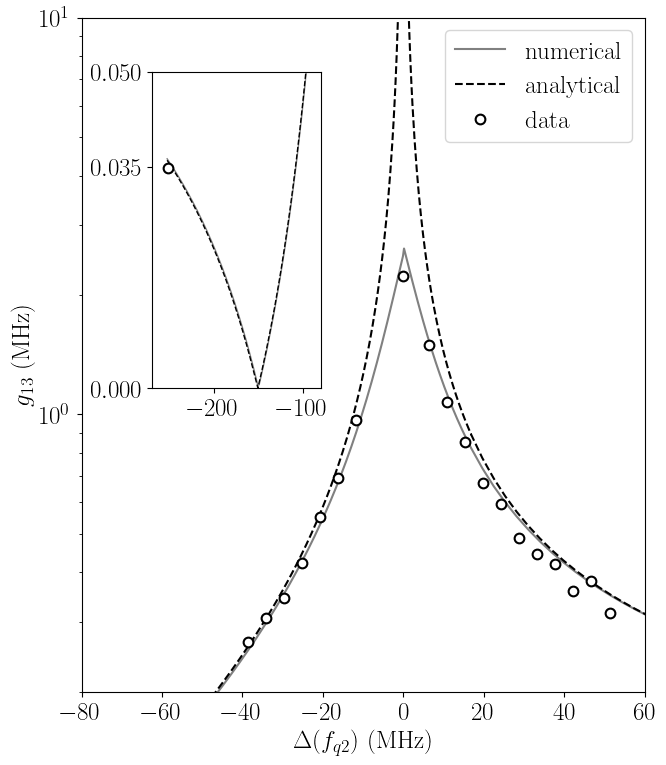

In [571]:
fig, ax = plt.subplots(1, 1, figsize = (7, 8), dpi = 100)

colors = [cmap(0.0), cmap(0.4), cmap(0.8)]
ms = 7
mew = 1.5

detuned_Δfq2 = -252
detuned_g13 = 0.04917

ax.plot(Δfq2 , (σyσy + σxσx)  * 1e3, '-', color='gray', label = 'numerical')
#ax.plot(Δfq2 , σzσz  * 1e3, color=colors[2], linestyle=':')
ax.plot(Δfq2 , np.abs(g_13_analytic)  * 1e3, '--', color='k', label = 'analytical')

ax.set_xlim(-260, 300)
#ax.yaxis.tick_right()

ax.plot((fq2_set_vec[:7]-f2_of_max_g)*1e3, x0_array_opt[:7]*1e3, color='k', marker='o', mfc = 'white', mew = mew, ls='', ms=ms,label='data')
ax.plot((fq2_set_vec[10:]-f2_of_max_g)*1e3, x0_array_opt[10:]*1e3, color='k', marker='o', mfc = 'white', mew = mew, ls='', ms=ms)
ax.plot(0,3.16/np.sqrt(2), color='k', marker='o', mfc = 'white', mew = mew, ls='', ms=ms)


ax.set_yscale('log')

ax.set_xlabel(r'$\Delta(f_{q2})$ (MHz)')
ax.set_ylabel(r'$g_{13}$ (MHz)')

ax.set_ylim([20e-2, 10])
ax.set_xlim([-80, 60])

# inset Axes....
x1, x2, y1, y2 = -270, -80, 1e-4, 5e-2  # subregion of the original image
axins = ax.inset_axes(
    [0.125, 0.45, 0.3, 0.47],
    xlim=(x1, x2), ylim=(y1, y2))
axins.plot(Δfq2 , (σyσy + σxσx)  * 1e3, '-', lw = 1, color='gray', label = 'theory (numerical)')
axins.plot(Δfq2 , np.abs(g_13_analytic)  * 1e3, '--', lw = 1, color='k', label = 'theory (analytical)')
axins.plot(detuned_Δfq2, detuned_g13/np.sqrt(2), marker='o', mew = mew, ls='', color='k', mfc = 'white', ms=ms)
axins.set_yticks([0, 0.035, 0.05])

# ax.indicate_inset_zoom(axins, edgecolor="black")
ax.legend(loc = 'upper right')

fig.tight_layout()

plt.savefig("g_13.pdf", format="pdf", bbox_inches="tight")


# Export or show the figure
# fig.show()

### C12 = 0.0525, C13 = 0004

In [420]:
C11 = CF_1
C22 = CF_2
C33 = CF_3

C12 = 0.0525
C21 = 0.0525
C23 = 0.0525
C32 = 0.0525

C13 = 0.0005
C31 = C13

C = np.array([ [C11, C12, C13], [C21, C22, C23], [C31, C32, C33] ])
C_inv = np.linalg.inv(C)
C_mat = C_inv

In [421]:
for i, φ_ext_2 in enumerate(φ_ext_2_values):
    
    Δfq2[i], SWT[i,:], g_13_analytic[i] = calc_effective_qq_coupling(φ_ext_2, C_inv)

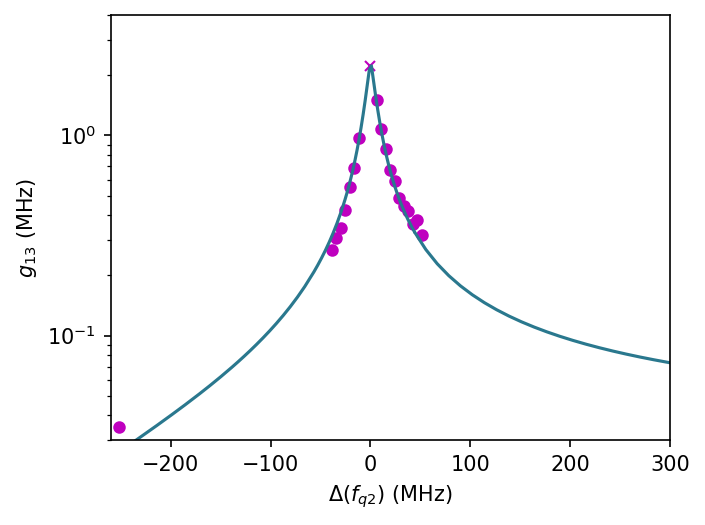

In [422]:
fig, ax = plt.subplots(1, 1 ,dpi=150, figsize=np.array([8, 6])*0.6)


colors = [cmap(0.0), cmap(0.4), cmap(0.8)]

detuned_Δfq2 = -252
detuned_g13 = 0.04917


ax.plot(detuned_Δfq2, detuned_g13/np.sqrt(2), marker='o', ls='', color='m', ms=5, label='pt used for exp fit, extract with spectros.')


ax.set_xlim(-260, 300)
#ax.yaxis.tick_right()


ax.plot((fq2_set_vec[:7]-f2_of_max_g)*1e3, x0_array_opt[:7]*1e3, color='m', marker='o', ls='', ms=5,label='spectrum')
ax.plot((fq2_set_vec[10:]-f2_of_max_g)*1e3, x0_array_opt[10:]*1e3, color='m', marker='o', ls='', ms=5)
ax.plot(0,3.16/np.sqrt(2), color='m', marker='x', ls='', ms=5, label='Ramsey')


σxσx = np.abs(SWT[:, 1, 1])
σyσy = np.abs(SWT[:, 2, 2])
σzσz = np.abs(SWT[:, 3, 3])

ax.plot(Δfq2 , np.sqrt(σyσy**2 + σxσx**2)  * 1e3, '-', color=colors[1])
#ax.plot(Δfq2 , σzσz  * 1e3, color=colors[2], linestyle=':')


        
ax.set_yscale('log')
#ax.set_xscale('symlog', linthresh = 100)


ax.set_xlabel(r'$\Delta(f_{q2})$ (MHz)')
ax.set_ylabel(r'$g_{13}$ (MHz)')

ax.set_ylim([3e-2, 4])
#ax.set_xlim([-700, 700])


# # inset Axes....
# x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
# axins = ax.inset_axes(
#     [0.5, 0.5, 0.47, 0.47],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# axins.plot(Z2)

# ax.indicate_inset_zoom(axins, edgecolor="black")

fig.tight_layout()

# Export or show the figure
# fig.show()
